In [1]:
##############################################################################################################
# DESCRIPTION: Para Report. Con el máximo de imágenes eliminadas.
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

class HyperParams:
    pass

IMG_PATH = "E:/TFM/Data/Dataset/NoiseCorrec_0100_1000/work/"
#IMG_PATH = "D:/UNIR/TFM/Docs/NoiseCorrec/NoiseCorrec_0100_1000/TIFF/work/divided_64x64/filtered/work_da/"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

hyperparams = HyperParams()
hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 200
hyperparams.BATCH_SIZE = 32
hyperparams.START_NEURONS = 8 # UNET

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0595
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.326

from tensorflow.keras.optimizers import Adam
hyperparams.OPTIMIZER = Adam(learning_rate=0.0005)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModel as train
import ReportsF as reports

In [4]:
##################
# MODEL DEFINITION
##################

import UnetD as model_factory

model = model_factory.buildModel(hyperparams)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 8)    80          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 8)    584         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 32, 32, 8)    0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [5]:
model.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.0005,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [6]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
val_noisy_files, val_nitid_files, val_noisy, val_nitid = dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: E:/TFM/Data/Dataset/NoiseCorrec_0100_1000/work/
Noisy files:2632
Nitid files:2632
Read dataset. Path: E:/TFM/Data/Dataset/NoiseCorrec_0100_1000/work/validation/
Noisy files:658
Nitid files:658


In [7]:
##################
# TRAIN MODEL
##################
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)


hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid )

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1660, pci bus id: 0000:06:00.0, compute capability: 7.5

Epoch 1/200
83/83 [==============================] - 21s 93ms/step - loss: 0.0534 - mean_squared_error: 0.0534 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 2/200
83/83 [==============================] - 5s 55ms/step - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 3/200
83/83 [==============================] - 5s 55ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 4/200
83/83 [==============================] - 5s 55ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 5/200
83/83 [==============================] - 5s 55ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 6/200
83/83 [====================

83/83 [==============================] - 5s 55ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 101/200
83/83 [==============================] - 5s 55ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 102/200
83/83 [==============================] - 5s 55ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 9.7316e-04 - val_mean_squared_error: 9.7316e-04
Epoch 103/200
83/83 [==============================] - 5s 55ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 104/200
83/83 [==============================] - 5s 55ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 9.6040e-04 - val_mean_squared_error: 9.6040e-04
Epoch 105/200
83/83 [==============================] - 5s 55ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 106/200


83/83 [==============================] - 5s 55ms/step - loss: 9.7457e-04 - mean_squared_error: 9.7457e-04 - val_loss: 9.8287e-04 - val_mean_squared_error: 9.8287e-04
Epoch 197/200
83/83 [==============================] - 5s 55ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 9.8461e-04 - val_mean_squared_error: 9.8461e-04
Epoch 198/200
83/83 [==============================] - 5s 55ms/step - loss: 9.5739e-04 - mean_squared_error: 9.5739e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 199/200
83/83 [==============================] - 5s 55ms/step - loss: 9.9953e-04 - mean_squared_error: 9.9953e-04 - val_loss: 9.8233e-04 - val_mean_squared_error: 9.8233e-04
Epoch 200/200
83/83 [==============================] - 5s 55ms/step - loss: 9.5450e-04 - mean_squared_error: 9.5450e-04 - val_loss: 9.5559e-04 - val_mean_squared_error: 9.5559e-04
Train size:2632
Valid.size:658
--- 932.6207146644592 seconds ---


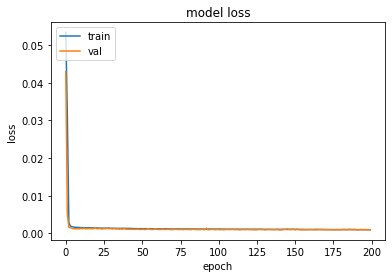

In [8]:
##################
# REPORTS
##################

reports.plotHistory( hist )

In [9]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.1
reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD  )

Images count =658
Best MSE     =589 (0.90)
Best Accuracy=560 (0.85)
MSE-NZ   Pred=0.0010  Noisy=0.0127
MSE      Pred=0.0010  Noisy=0.0127
PSNR     Pred=20.6 dB Noisy=10.2 dB
Accuracy Pred=0.45    Noisy=0.06


Read dataset. Path: E:/TFM/Data/Dataset/NoiseCorrec_0100_1000/work/test/
Noisy files:8
Nitid files:8
Index:0
E:/TFM/Data/Dataset/NoiseCorrec_0100_1000/work/test\VI0112_00_02_13_noisy_idx123.tif
E:/TFM/Data/Dataset/NoiseCorrec_0100_1000/work/test\VI0112_00_02_13_nitid_idx134.tif


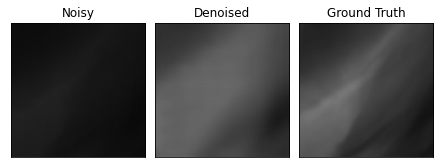

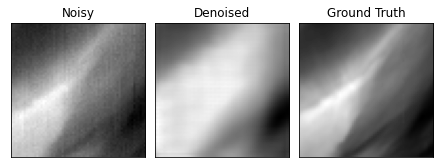

MSE-NZ   Pred=0.0047  Noisy=0.0326
MSE      Pred=0.0047  Noisy=0.0326 BEST
PSNR     Pred=16.6 dB Noisy=8.2 dB BEST
Accuracy Pred=0.16    Noisy=0.00 BEST
******************************************************
Index:1
E:/TFM/Data/Dataset/NoiseCorrec_0100_1000/work/test\VI0112_01_00_6_noisy_idx014.tif
E:/TFM/Data/Dataset/NoiseCorrec_0100_1000/work/test\VI0112_01_00_6_nitid_idx017.tif


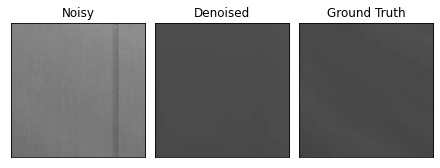

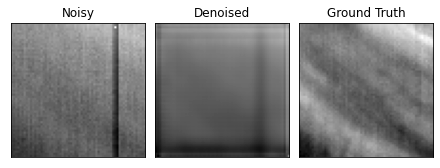

MSE-NZ   Pred=0.0001  Noisy=0.0415
MSE      Pred=0.0001  Noisy=0.0415 BEST
PSNR     Pred=30.0 dB Noisy=4.0 dB BEST
Accuracy Pred=1.00    Noisy=0.00 BEST
******************************************************
Index:2
E:/TFM/Data/Dataset/NoiseCorrec_0100_1000/work/test\VI0127_01_02_13_noisy_idx123.tif
E:/TFM/Data/Dataset/NoiseCorrec_0100_1000/work/test\VI0127_01_02_13_nitid_idx134.tif


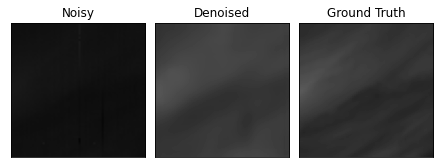

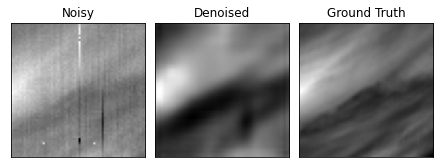

MSE-NZ   Pred=0.0014  Noisy=0.0197
MSE      Pred=0.0014  Noisy=0.0197 BEST
PSNR     Pred=19.3 dB Noisy=8.0 dB BEST
Accuracy Pred=0.22    Noisy=0.00 BEST
******************************************************
Index:3
E:/TFM/Data/Dataset/NoiseCorrec_0100_1000/work/test\VI0323_01_02_11_noisy_idx123.tif
E:/TFM/Data/Dataset/NoiseCorrec_0100_1000/work/test\VI0323_01_02_11_nitid_idx134.tif


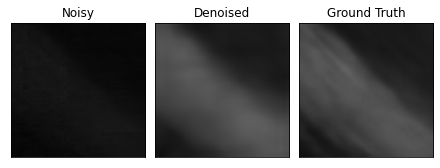

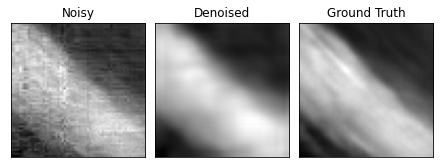

MSE-NZ   Pred=0.0004  Noisy=0.0302
MSE      Pred=0.0004  Noisy=0.0302 BEST
PSNR     Pred=26.0 dB Noisy=6.9 dB BEST
Accuracy Pred=0.78    Noisy=0.00 BEST
******************************************************
Index:4
E:/TFM/Data/Dataset/NoiseCorrec_0100_1000/work/test\VI0574_00_03_9_noisy_idx157.tif
E:/TFM/Data/Dataset/NoiseCorrec_0100_1000/work/test\VI0574_00_03_9_nitid_idx146.tif


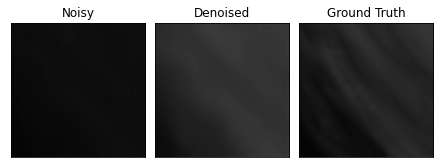

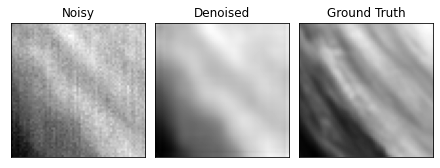

MSE-NZ   Pred=0.0031  Noisy=0.0066
MSE      Pred=0.0031  Noisy=0.0066 BEST
PSNR     Pred=11.6 dB Noisy=8.4 dB BEST
Accuracy Pred=0.02    Noisy=0.01 BEST
******************************************************
Index:5
E:/TFM/Data/Dataset/NoiseCorrec_0100_1000/work/test\VI0574_02_02_10_noisy_idx123.tif
E:/TFM/Data/Dataset/NoiseCorrec_0100_1000/work/test\VI0574_02_02_10_nitid_idx134.tif


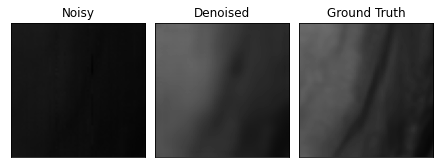

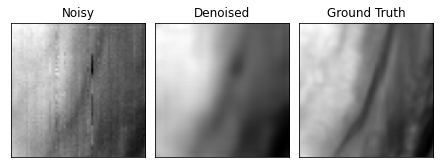

MSE-NZ   Pred=0.0004  Noisy=0.0335
MSE      Pred=0.0004  Noisy=0.0335 BEST
PSNR     Pred=27.0 dB Noisy=7.3 dB BEST
Accuracy Pred=0.73    Noisy=0.00 BEST
******************************************************
Index:6
E:/TFM/Data/Dataset/NoiseCorrec_0100_1000/work/test\VI0812_00_02_10_noisy_idx123.tif
E:/TFM/Data/Dataset/NoiseCorrec_0100_1000/work/test\VI0812_00_02_10_nitid_idx134.tif


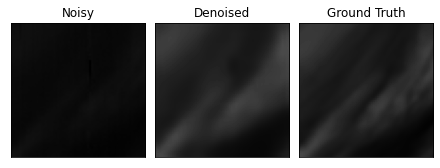

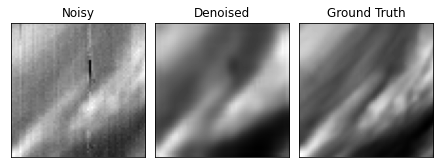

MSE-NZ   Pred=0.0007  Noisy=0.0090
MSE      Pred=0.0007  Noisy=0.0090 BEST
PSNR     Pred=20.6 dB Noisy=9.4 dB BEST
Accuracy Pred=0.34    Noisy=0.01 BEST
******************************************************
Index:7
E:/TFM/Data/Dataset/NoiseCorrec_0100_1000/work/test\VI0818_08_03_2_noisy_idx157.tif
E:/TFM/Data/Dataset/NoiseCorrec_0100_1000/work/test\VI0818_08_03_2_nitid_idx146.tif


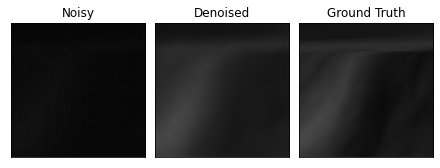

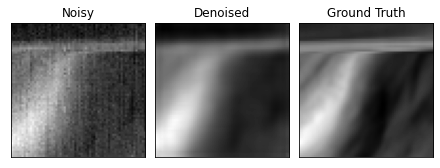

MSE-NZ   Pred=0.0006  Noisy=0.0096
MSE      Pred=0.0006  Noisy=0.0096 BEST
PSNR     Pred=21.7 dB Noisy=9.3 dB BEST
Accuracy Pred=0.42    Noisy=0.00 BEST
******************************************************


In [10]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
test_noisy, test_nitid = dsutils.reshapeDataset( test_noisy, test_nitid,  hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
test_indexes = np.arange(0,test_noisy.shape[0])

predictions = reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, ACCURACY_THRESHOLD, radiance_limits.nitid_max, True )

In [11]:
model.save('C:/Users/Marti/TFM/saves/unet-30-j.h5')